<a href="https://colab.research.google.com/github/Bhavya0608-hub/Bhavya0608-hub-Cat-and-Dog-classification--Transfer-Learning/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#importing dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:07<00:00, 166MB/s]
100% 812M/812M [00:07<00:00, 118MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
#counting number of files in train folder
path, dirs, files= next(os.walk('/content/train'))
file_count=len(files)
print('no of images: ', file_count)

no of images:  25000


In [12]:
#printing the name of images
file_names= os.listdir('/content/train')
print(file_names)

['dog.10978.jpg', 'cat.12150.jpg', 'dog.4140.jpg', 'cat.9118.jpg', 'dog.9377.jpg', 'dog.12130.jpg', 'dog.4679.jpg', 'cat.9872.jpg', 'cat.10263.jpg', 'dog.3661.jpg', 'dog.1887.jpg', 'dog.1573.jpg', 'cat.1034.jpg', 'dog.4789.jpg', 'cat.1958.jpg', 'cat.5195.jpg', 'cat.3550.jpg', 'cat.765.jpg', 'cat.5245.jpg', 'cat.8822.jpg', 'dog.6751.jpg', 'cat.12394.jpg', 'dog.7675.jpg', 'dog.12416.jpg', 'dog.2202.jpg', 'dog.6422.jpg', 'dog.4203.jpg', 'dog.7367.jpg', 'cat.7994.jpg', 'dog.1717.jpg', 'dog.8419.jpg', 'dog.5683.jpg', 'dog.5972.jpg', 'dog.6844.jpg', 'cat.2851.jpg', 'cat.5961.jpg', 'cat.914.jpg', 'dog.1734.jpg', 'dog.6122.jpg', 'cat.7029.jpg', 'cat.1178.jpg', 'dog.10078.jpg', 'dog.3334.jpg', 'cat.2760.jpg', 'cat.8128.jpg', 'cat.12097.jpg', 'cat.1361.jpg', 'cat.10987.jpg', 'dog.10651.jpg', 'cat.10580.jpg', 'dog.7424.jpg', 'cat.9856.jpg', 'cat.4336.jpg', 'dog.1678.jpg', 'cat.937.jpg', 'dog.12175.jpg', 'cat.10516.jpg', 'dog.626.jpg', 'dog.463.jpg', 'cat.7724.jpg', 'cat.703.jpg', 'dog.4306.jpg', 

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

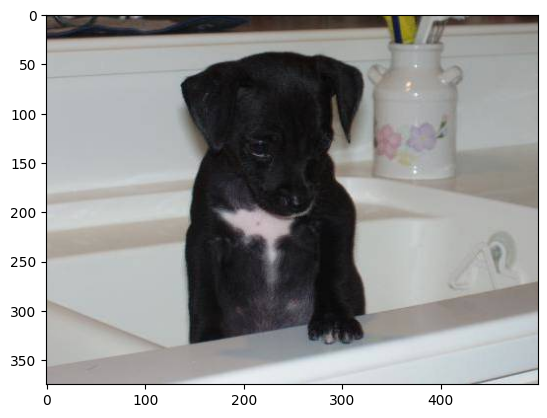

In [17]:
#displaying dog image
img= mpimg.imread('/content/train/dog.8298.jpg')
imgplot= plt.imshow(img)
plt.show()

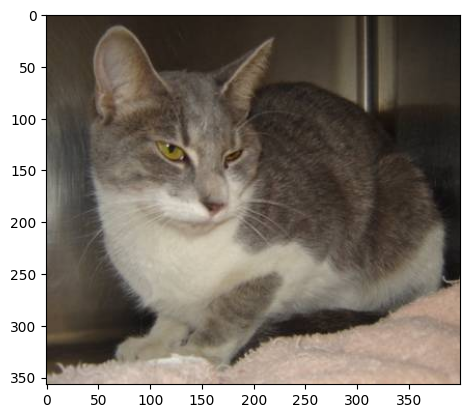

In [19]:
#displaying cat image
img= mpimg.imread('/content/train/cat.4352.jpg')
imgplot= plt.imshow(img)
plt.show()

In [21]:
file_names= os.listdir('/content/train')

for i in range(5):

  name=file_names[i]
  print(name[0:3])


dog
cat
dog
cat
dog


In [23]:
file_names= os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_names:
  name= img_file[0:3]

  if name=='dog':
    dog_count=dog_count+1
  elif name=='cat':
    cat_count=cat_count+1

print('no of dogs: ', dog_count)
print('no of cats: ', cat_count)

no of dogs:  12500
no of cats:  12500


In [24]:
#resizing the images
os.mkdir('/content/image resized')

In [35]:
orignal_folder= '/content/train/'
resized_folder= '/content/image resized/'

for i in range(3000):
  filename= os.listdir(orignal_folder)[i]
  img_path= orignal_folder+filename

  img= Image.open(img_path)
  img= img.resize((224,224))
  img= img.convert('RGB')

  newImgPath= resized_folder+filename
  img.save(newImgPath)

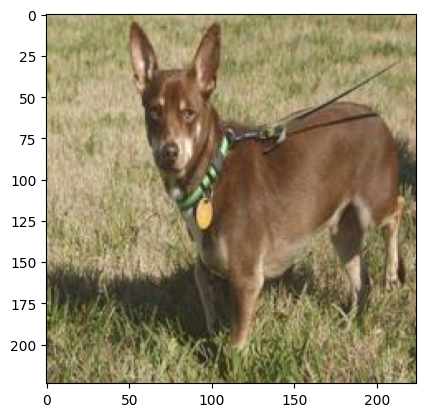

In [36]:
#displaying resized dog image
img= mpimg.imread('/content/image resized/dog.10978.jpg')
imgplot= plt.imshow(img)
plt.show()

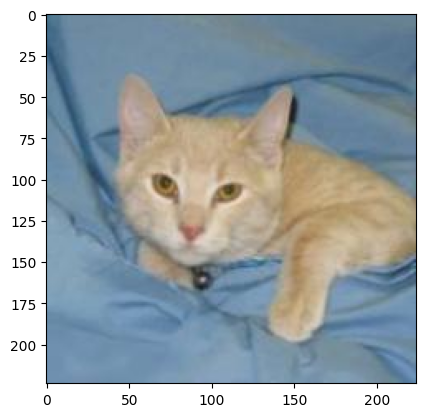

In [37]:
#displaying resized cat image
img= mpimg.imread('/content/image resized/cat.12150.jpg')
imgplot= plt.imshow(img)
plt.show()

In [38]:
#labeling----- (0 for cat and 1 for dog)
filenames= os.listdir('/content/image resized')

labels=[]

for i in range(3000):
  file_name= filenames[i]
  label= file_name[0:3]

  if label=='dog':
    labels.append(1)
  elif label=='cat':
    labels.append(0)


In [39]:
print(filenames[0:5])
print(len(filenames))

['dog.10978.jpg', 'cat.12150.jpg', 'dog.4140.jpg', 'cat.9118.jpg', 'dog.9377.jpg']
3000


In [40]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
3000


In [41]:
#counting the images of dogs and cats out of 2000 images
values, counts= np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1523 1477]


In [42]:
#converting all the resized images to numpy arrays
import cv2
import glob

In [43]:
image_directory='/content/image resized/'
image_extension= ['png', 'jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images= np.asarray([cv2.imread(file) for file in files])

In [44]:
print(dog_cat_images)

[[[[133 169 179]
   [138 174 184]
   [149 185 195]
   ...
   [130 167 181]
   [142 180 192]
   [136 174 186]]

  [[142 178 188]
   [136 172 182]
   [141 177 187]
   ...
   [128 165 179]
   [139 177 189]
   [133 171 183]]

  [[144 183 192]
   [124 163 172]
   [120 159 168]
   ...
   [126 165 179]
   [132 172 184]
   [126 166 178]]

  ...

  [[100 139 147]
   [ 73 112 120]
   [ 80 119 128]
   ...
   [ 74 119 123]
   [104 151 155]
   [118 165 169]]

  [[ 75 116 125]
   [ 81 122 131]
   [ 96 137 146]
   ...
   [ 86 133 137]
   [ 91 138 142]
   [105 153 155]]

  [[ 74 117 126]
   [ 77 120 129]
   [ 78 119 128]
   ...
   [ 53 100 104]
   [ 30  78  80]
   [ 80 128 130]]]


 [[[134 110  68]
   [136 112  70]
   [141 117  75]
   ...
   [151 130 103]
   [151 130 103]
   [151 130 103]]

  [[135 111  69]
   [137 113  71]
   [141 117  75]
   ...
   [151 130 103]
   [151 130 103]
   [151 130 103]]

  [[136 112  70]
   [138 114  72]
   [142 118  76]
   ...
   [149 130 103]
   [149 130 103]
   [149 130

In [45]:
type(dog_cat_images)

numpy.ndarray

In [46]:
print(dog_cat_images.shape)

(3000, 224, 224, 3)


In [47]:
X= dog_cat_images
Y= np.asarray(labels)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


In [50]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [51]:
print(X_train_scaled)

[[[[0.13333333 0.16078431 0.14117647]
   [0.12941176 0.15686275 0.1372549 ]
   [0.12156863 0.14901961 0.1372549 ]
   ...
   [0.6745098  0.69019608 0.64313725]
   [0.63529412 0.63921569 0.6       ]
   [0.60784314 0.61176471 0.57254902]]

  [[0.2745098  0.30196078 0.28235294]
   [0.24705882 0.2745098  0.25490196]
   [0.21176471 0.23921569 0.22745098]
   ...
   [0.65882353 0.6745098  0.62745098]
   [0.64313725 0.65098039 0.60392157]
   [0.63529412 0.64313725 0.59607843]]

  [[0.30980392 0.3372549  0.3254902 ]
   [0.27843137 0.30588235 0.29411765]
   [0.24313725 0.27058824 0.25882353]
   ...
   [0.65098039 0.67058824 0.61176471]
   [0.65882353 0.67058824 0.61176471]
   [0.66666667 0.67843137 0.61960784]]

  ...

  [[0.16862745 0.08627451 0.12156863]
   [0.18039216 0.09803922 0.13333333]
   [0.20784314 0.1254902  0.16078431]
   ...
   [0.8        0.49019608 0.54509804]
   [0.73333333 0.41568627 0.4745098 ]
   [0.81176471 0.49411765 0.55294118]]

  [[0.17254902 0.09019608 0.1254902 ]
   [0.1

In [52]:
import tensorflow as tf
import tensorflow_hub as hub

In [59]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [70]:
!pip install tf_keras

In [71]:
import tf_keras

In [72]:
num_of_classes=2
model= tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [74]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 92s 1s/step - loss: 0.9292 - accuracy: 0.8450
Epoch 2/5
75/75 [==============================] - 85s 1s/step - loss: 0.5926 - accuracy: 0.8804
Epoch 3/5
75/75 [==============================] - 80s 1s/step - loss: 0.5915 - accuracy: 0.8788
Epoch 4/5
75/75 [==============================] - 85s 1s/step - loss: 0.5909 - accuracy: 0.8783
Epoch 5/5
75/75 [==============================] - 85s 1s/step - loss: 0.5742 - accuracy: 0.8692


In [76]:
score, acc= model.evaluate(X_test_scaled, Y_test)
print('Test loss: ', score)
print('Test accuracy: ', acc)

19/19 [==============================] - 29s 2s/step - loss: 0.5545 - accuracy: 0.8583
Test loss:  0.5545177459716797
Test accuracy:  0.8583333492279053


Path of the image: /content/Dog_Breeds.jpg


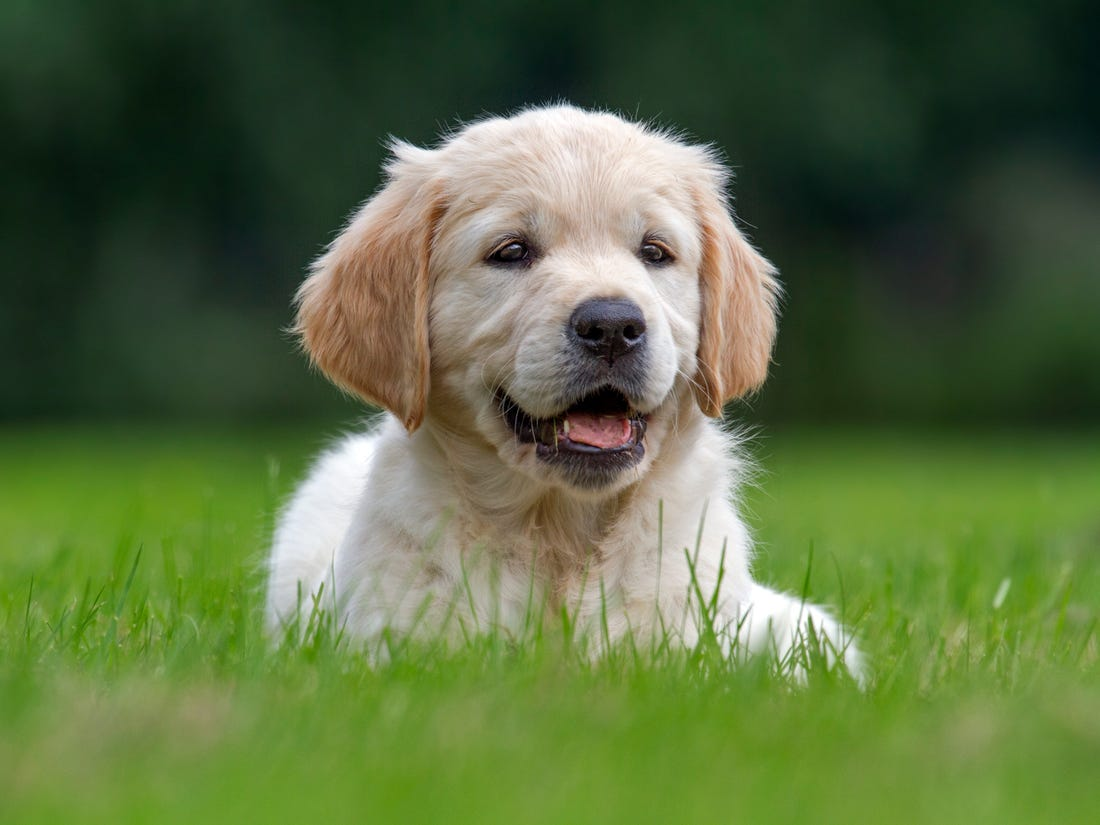

1/1 [==============================] - 1s 680ms/step
[[-1.844549  -1.4186133]]
1
The image represents a Dog


In [77]:
input_image_path= input("Path of the image: ")

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image= cv2.resize(input_image, (224,224))

input_image= input_image/255

input_img= np.reshape(input_image, (1,224,224,3))

input_prediction= model.predict(input_img)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image: /content/cat.jpg


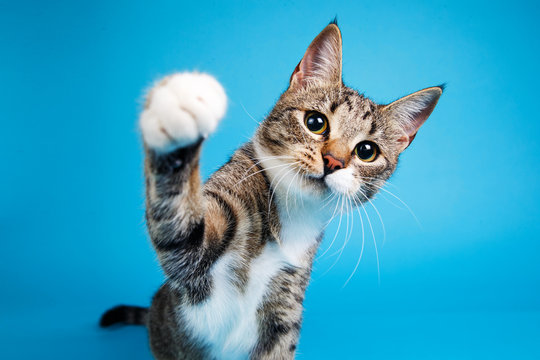

1/1 [==============================] - 0s 54ms/step
[[-0.05412313 -3.164872  ]]
0
The image represents a Cat


In [78]:
input_image_path= input("Path of the image: ")

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image= cv2.resize(input_image, (224,224))

input_image= input_image/255

input_img= np.reshape(input_image, (1,224,224,3))

input_prediction= model.predict(input_img)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')